
# Project: No Show appointment dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset contains 100k medical appointment of different patients in Brazil and whether or not they showed up for their scheduled appoinment. The dataset contains 14 columns which identifies the schedule dates, appoinment dates, neighbourhood wher the patients are coming from, whether or not they showed up Etc.

* PatientId: Identification of a patient,
* AppointmentID: Identification of each appointment
* Gender: Male or Female,
* DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
* DataMarcacaoConsulta: The day of the actuall appointment,
* DataAgendamento: The day someone called or registered the appointment
* Age: How old is the patient,
* Neighbourhood: Where the appointment takes place.
* Hypertension: Hypertension patient or not,
* Diabetes: Diabetes patient or not
* Alcoholism: Is the patient addicted to alcohol or not,
* Handicap: Handicap patient or not
* SMS_received: Did the patient receive a message or not,
* No-show: It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
* what percentage of men and women showed and didnt show up to the appointent ?
* how many patient got an sms showedup and didnt showup?
* what age grop showed up for the appointment?

These are the packages that we will use in this analysis:
* Numpy
* Pandas
* Matplotlib

so we will proceed in importing them

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In this secion, we will be loading our dataset and checking the properties,
types and look for instances of missing or possibly errant data.


In [9]:
patients = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
patients

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [100]:
print(patients.shape)
patients.info()
patients.describe()    


(110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning


In this section of data cleaning, we will:
* check for null values
* duplicated values 
* wrong data types before
and then proceed in cleaning them.

In [101]:
patients.count()
patients.isnull().any()
patients.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

we will be dropping the columns that wont be relevant to our analysis

In [258]:
dropped_columns=patients.drop(patients.columns[[6]], axis=1, inplace=True)

 The dataset is a clean dataset and we can proceed with our exploration

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : what percentage of male and female patients showed up and didnt show up?

Lets visualize the various columns using an histogram.

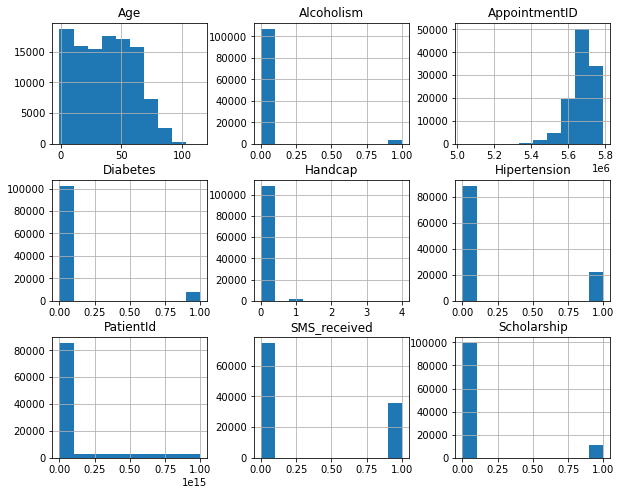

In [29]:
plot_distribution= patients.hist(figsize=(10,8));

The histogram above shows individual columns and their ranges in the dataset

Now lets find the number of male and female first before plotting the percentages of those showed and didnt show for their appointment

Text(0.5, 1.0, 'percentage of male and female patients')

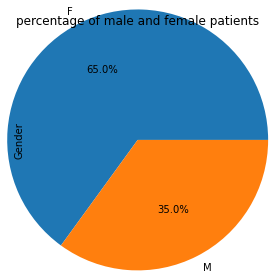

In [16]:
#now we will use the following code to chseck the percentage of male and female patients

no_of_gender = patients['Gender'].value_counts().plot(kind='pie',
                                                      autopct='%1.1f%%', radius = 1.5)
plt.title('percentage of male and female patients')

we can see we have a total of 65% of female patients and 35% of male patients

In [65]:
# now lets check the percentage of male and female that attended and didnt attend the appointment

gender_percent = (patients.groupby('Gender')['No-show'].value_counts(normalize=True)).reset_index(name='percent')
print(gender_percent)

  Gender No-show   percent
0      F      No  0.796854
1      F     Yes  0.203146
2      M      No  0.800321
3      M     Yes  0.199679


Text(0, 0.5, 'No-show')

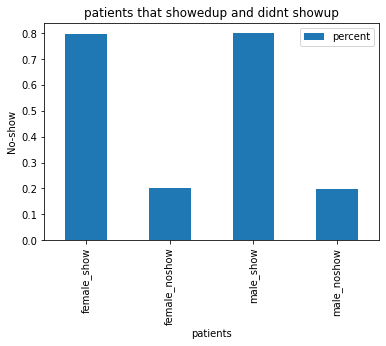

In [33]:
#in this code, we will crate a dataframe for the percent and gender, so we can plot a bar chart showing the 
# percentage of male and female that showedup and didnt showup

percent_plot= pd.DataFrame({'percent': [0.796854,0.203146,0.800321,0.199679]},
                          index=['female_show','female_noshow', 'male_show', 'male_noshow'])
percent_plot.plot(kind='bar', title='patients_that_show_and_didnt_show')

plt.title('patients that showedup and didnt showup')
plt.xlabel('patients')
plt.ylabel('No-show')

we can see that 79% of females showed and 20% of females didnt. Also, 80% of males came for the appointment and 19% of males didnt.

### Research Question 2 : how many patient got an sms showup and didn't show up?

Due to many reasons, patients might recieve an sms about their appoinment but still ignore.
In this exploration, we will check the number of patients that got the sms and then prceed to find the those that didnt show up

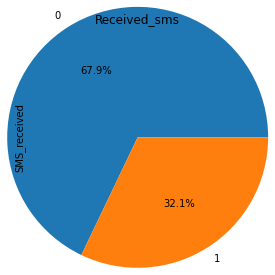

In [63]:
# lets first check the percentage of those that received sms

sms_percent=patients['SMS_received'].value_counts().plot(kind='pie', 
                                                         title = 'Received_sms', autopct='%1.1f%%', radius = 1.5)

we can see from the pie chart that the number of those that received sms is 32.1% and those that didnt is 67.9%.
From this we can deduce that less people got the sms informing them about their appointment.
But let us go further to see the number of those that showed up and didnt show even after receiving the sms .

In [31]:
#lets check the males and females that received and did not receive an appointment sms 
patients_sms = patients[['No-show', 'SMS_received']]
patients_sms.head(10)

,No-show,SMS_received
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0
5,No,0
6,Yes,0
7,Yes,0
8,No,0
9,No,0


In [18]:
#lets fond the percentage of those that received and showedup and those that received the sms and didnt
didnt_show= (patients.groupby('SMS_received')['No-show'].value_counts(normalize=True).reset_index(name = 'percent'))
didnt_show

,SMS_received,No-show,percent
0,0,No,0.832967
1,0,Yes,0.167033
2,1,No,0.724255
3,1,Yes,0.275745


we can see that the percentage of those that received the sms and showed up is 72.4% and 
those that receieved sms but didnt showup is 27.5% compared to those that didnt even receive he sms at all.
Let us visualize this properly using a bar chart

Text(0.5, 0, 'sms received')

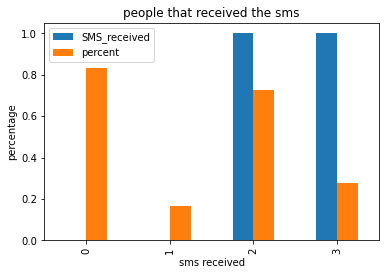

In [45]:
#we are visualizing the number of those that got the sms

received_sms= didnt_show.plot(kind='bar')

plt.title('people that received the sms')
plt.ylabel('percentage')
plt.xlabel('sms received')

### Research Question 3 : what age group showedup for the appointment?

In [50]:
#let us group this age so we can know the number of those that showed and didnt
# using the .cut methods
age_group=pd.cut(patients['Age'], bins =[-1,3,10,18,30,60, np.inf])

In [22]:
age_show=pd.crosstab(age_group, patients['No-show'])
age_show

No-show,No,Yes
Age,,
"(-1.0, 3.0]",7360,1583
"(3.0, 10.0]",7601,2205
"(10.0, 18.0]",7558,2559
"(18.0, 30.0]",12622,4143
"(30.0, 60.0]",36310,8823
"(60.0, inf]",16756,3006


In [58]:
# now lets visualize the grouping and know who showedup and didnt.


def age_bar():
    print(age_show.plot(kind='bar', title='Age group that showed up and didnt'))
         

AxesSubplot(0.125,0.125;0.775x0.755)


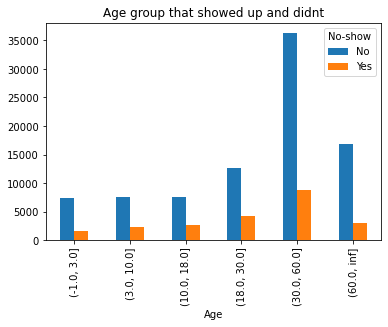

In [59]:
age_bar()

we can see in the chart that the highest age group who are adults that came for their appontment are between age of (30 to 60 and the lowest age group that 
came for the appointments are between the age of (-1 to 3)years old

<a id='conclusions'></a>
## Conclusions


The conclusion for each observation and question :

* what percentage of men and women showed and didnt show up to the appointent ?

 we can see in our findings that there are more female patients than male patients who registered for the appointment but 80% of males showedup compared to the  79% of the female patients. and fuurther analysis or research needs to be made to clarify the reason for difference in value and why.


* how many patient got an sms showedup and didnt showup?

From our analysis, we can see that 32.1% of patients received an sms while 67.% didnt. but 72.4% of the patients received an sms and showedup while 27.5% received the sms and still didnt showup. we can deduce from the analysis thatthe sms informing the patients of their appoinment is really effective. 


* what age grop showed up for the appointment?

we can see in the analysis that the highest age group who are adults that came for their appontment are between age of 30 to 60 years and the lowest age group that came for the appointments are between the age of -1 to 3 years old.


Limitations:
it was quite difficult grouping some of the columes due to their datatypes


Thank you.